In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
from knn import KNNClassifier

In [23]:
def read_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')

        image_data = np.frombuffer(f.read(), dtype=np.uint8)

    # Reshape to (num_images, num_rows, num_cols)
    images = image_data.reshape(num_images, num_rows, num_cols)
    
    # Normalize
    images = images / 255.0
    
    # Flatten the images (called feature matrix)
    flattened_images = images.reshape(num_images, -1)

    return flattened_images


def read_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')

        label_data = np.frombuffer(f.read(), dtype=np.uint8)

    return label_data

In [24]:
train_images = read_mnist_images('data/train-images-idx3-ubyte')
train_labels = read_mnist_labels('data/train-labels-idx1-ubyte')

test_images = read_mnist_images('data/t10k-images-idx3-ubyte')
test_labels = read_mnist_labels('data/t10k-labels-idx1-ubyte')

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 784)
Training labels shape: (60000,)
Test images shape: (10000, 784)
Test labels shape: (10000,)


In [29]:
# import numpy as np
# from sklearn.datasets import fetch_openml
# import matplotlib.pyplot as plt
# from PCA import PCA  # Assuming your PCA class is in a file named PCA.py

# # Load MNIST data
# print("Loading MNIST dataset...")
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# X = X.astype('float32')
# y = y.astype('int')

# # Normalize the data
# X = X / 255.0

# # Split the data
# X_train, X_test = X[:60000], X[60000:]
# y_train, y_test = y[:60000], y[60000:]
X_train = train_images[:60000]
X_test = test_images[:10000]

y_train = train_labels[:60000]
y_test = test_labels[:10000]

# Apply PCA
print("Applying PCA...")
n_components = 50  # You can adjust this
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original shape: {X_train.shape}")
print(f"Reduced shape: {X_train_pca.shape}")



Applying PCA...
Original shape: (60000, 784)
Reduced shape: (60000, 50)


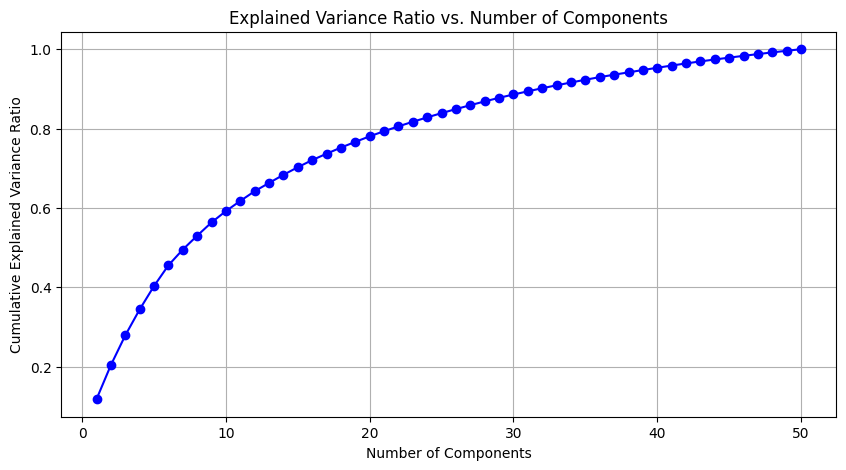

In [30]:
# Visualize explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio()
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()



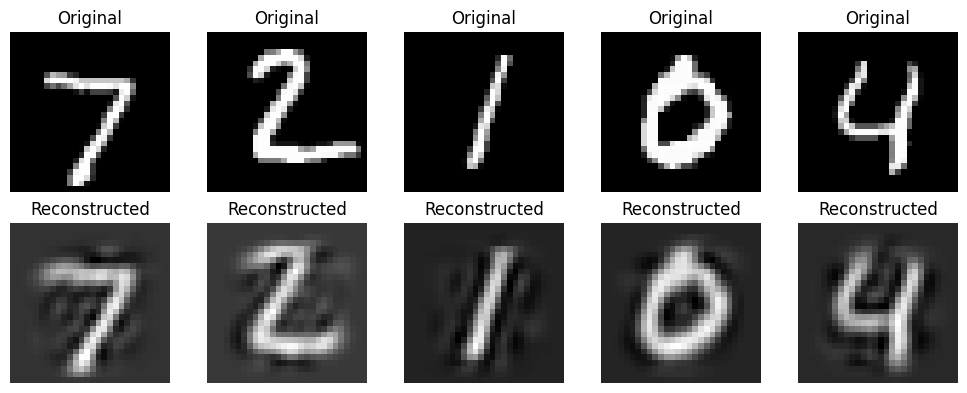

PCA analysis complete!


In [31]:
# Visualize some reconstructed images
n_img = 5
original_img = X_test[:n_img]
reconstructed_img = pca.inverse_transform(X_test_pca[:n_img])

fig, axes = plt.subplots(2, n_img, figsize=(n_img * 2, 4))
for i in range(n_img):
    axes[0, i].imshow(original_img[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # reconstructed_real = np.real(reconstructed_img[i]).reshape(28, 28)
    axes[1, i].imshow(np.real(reconstructed_img[i].reshape(28, 28)), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')

plt.tight_layout()
plt.show()

print("PCA analysis complete!")

In [28]:
reconstructed_img

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])